##### This notebook explores two different options for downloading meterological data on a 1km by 1km grid basis. 

##### 1) The first option epxlored here is "Daymet" hosted by Oak Ridge National Lab's Daily Surface Weather and Climatological Summaries. Link to Daymet dataset is available <a href="https://daymet.ornl.gov/">here</a>.  The dataset contains gridded estimates of daily weather data inlcuding total daily precipitation, minimum and maximum surface temperature, humidity, shortwave radiation, snow water equivalent and day length for whole of North America.


##### 2) The second option explored here is WorldClim data. WorldClim is a high resolution global weather data containing average temperature and precipitation on a 1km by 1km grid. Link to WorldClim dataset is available <a href="https://worldclim.org/">here</a>. 

##### The advantage of using Daymet over WorldClim are plenty. 

######                         a) Daymet data is more accessible than WorldClim data, especially for bulk downloads. 
######                        b) Daymet contains daily data from 1980 until the most recent full calendar year (2019). 
######                        c) Daymet contains several more parameters than WorldClim, as listed above. ###### d) Daymet is also only for North            America instead of global.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.ops import nearest_points

from mpl_toolkits.axes_grid1 import make_axes_locatable

import math

from matplotlib import cm

import matplotlib.lines as mlines

from datetime import datetime

import netCDF4 as nc

from netCDF4 import Dataset


import seaborn as sns


%matplotlib inline

#### Daymet Version 3 model output data contains gridded estimates of daily weather parameters for NA and Hawaii for the following parameters: minimum temperature, maximum temperature, precipitation, shortwave radiation, vapor pressure, snow water equivalent, and day length. The dataset covers the period from January 1, 1980 to December 31 of the most recent full calendar year. The data is in a Lamber Confirmal Conic Project for NA available in a netCDF file format. 

#### Use the following <a href = "https://thredds.daac.ornl.gov/thredds/catalog/ornldaac/1328/catalog.html">link</a> to download the data. 

In [5]:
# This cells explores the 2016 precipitation data. 
#fp='Data/daymet_v3_prcp_2016_na.nc4' 
fp='Data/wind.mon.mean.nc' 
nc_data = nc.Dataset(fp) # reading the nc file and creating Dataset

print(nc_data)


FileNotFoundError: [Errno 2] No such file or directory: b'Data/wind.mon.mean.nc'

In [3]:
# The netcdf file is of dimension (365, 7814, 8075)

In [4]:
y = nc_data.variables['lat'][:] # read latitutde variable
x = nc_data.variables['lon'][:] # read longitude variable
print((y,x)) # print latitutde, longitude

(masked_array(
  data=[[58.527702 , 58.536274 , 58.54484  , ..., 69.09396  , 69.08651  ,
         69.07905  ],
        [58.52478  , 58.533348 , 58.54192  , ..., 69.0904   , 69.08294  ,
         69.07548  ],
        [58.521854 , 58.530426 , 58.538994 , ..., 69.08683  , 69.07937  ,
         69.071915 ],
        ...,
        [ 6.0955505,  6.0989065,  6.1022615, ..., 10.021997 , 10.019393 ,
         10.0167885],
        [ 6.088467 ,  6.091822 ,  6.0951767, ..., 10.014288 , 10.011684 ,
         10.00908  ],
        [ 6.0813837,  6.0847383,  6.0880923, ..., 10.006578 , 10.003976 ,
         10.001372 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32), masked_array(
  data=[[ 156.37123  ,  156.37682  ,  156.38242  , ...,   -6.172987 ,
           -6.1630044,   -6.1530266],
        [ 156.38762  ,  156.39322  ,  156.3988   , ...,   -6.193871 ,
           -6.183884 ,   -6.173902 ],
        [ 156.404    ,  156.4096   ,  156.41519  , ...,   -6.2147493,
           -6.2047586,   -6.1947727],
     

In [5]:
# Reading and printing in precipitation attribute
print(nc_data.variables['prcp']) # print the variable attributes

<class 'netCDF4._netCDF4.Variable'>
float32 prcp(time, y, x)
    _FillValue: -9999.0
    long_name: daily total precipitation
    units: mm/day
    missing_value: -9999.0
    coordinates: lat lon
    grid_mapping: lambert_conformal_conic
    cell_methods: area: mean time: sum
unlimited dimensions: time
current shape = (365, 8075, 7814)
filling on


In [6]:
# The netCDF file has dimensions stored as a dictionary
print(nc_data.dimensions.keys())

odict_keys(['x', 'y', 'time', 'nv'])


In [7]:
# the netCDF file has variables stored as a dictionary
print(nc_data.variables.keys())

odict_keys(['x', 'y', 'lat', 'lon', 'time', 'yearday', 'time_bnds', 'lambert_conformal_conic', 'prcp'])


In [8]:
# We only want to plot the precipitation data
precipitation = nc_data.variables['prcp']

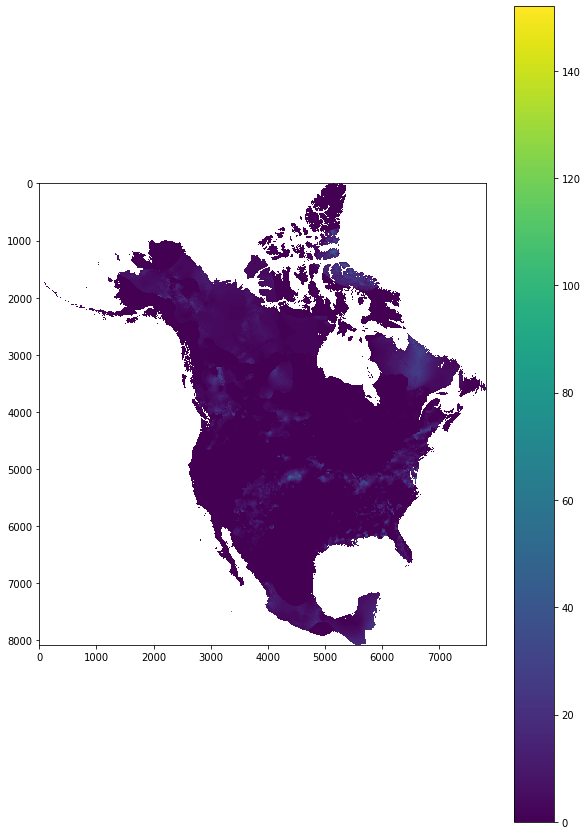

In [9]:
# Here, precipitation has a dimension of 365xlatxlong, so each day is stores as a single image
plt.figure(figsize = (10,15))
plt.imshow(precipitation[200], interpolation = 'none')
plt.colorbar()

#### An easier way to read Daymet data is to use the 'daymetpy' package. Documentation for this package is available <a href = "https://github.com/khufkens/daymetpy"> here. </a> 

### Testing the Daymet Py package for one location

In [2]:
import sys
sys.path.append(r"..")

import daymetpy

In [3]:
lat_1, long_1 = 37.806781, -122.322594 
df = daymetpy.daymet_timeseries(lon=long_1, lat=lat_1, start_year=2015, end_year=2016, as_dataframe=True)

###### Units for each parameter is as follows: yday - day of year; dayl - amount of sunlight in each in s/day; precipitation in mm/day; shortwave radiation in W/m2; snow water equivalent in kg/m2; maximum air temperature in degrees C; minimum air temperature in degrees C; water vapor pressure in Pa. Further documentation is available <a href = "https://daymet.ornl.gov/overview"> here. </a>

In [4]:
df.tail()

,year,yday,dayl,prcp,srad,swe,tmax,tmin,vp
2016-12-26,2016.0,361.0,33868.800781,0.0,211.199997,0.0,12.0,4.0,800.0
2016-12-27,2016.0,362.0,33868.800781,0.0,230.399994,0.0,13.0,3.5,800.0
2016-12-28,2016.0,363.0,33868.800781,0.0,249.600006,0.0,15.5,4.0,800.0
2016-12-29,2016.0,364.0,33868.800781,0.0,236.800003,0.0,16.5,6.0,920.0
2016-12-30,2016.0,365.0,33868.800781,0.0,233.600006,0.0,16.0,6.0,920.0


#### Visualizing Daymet data

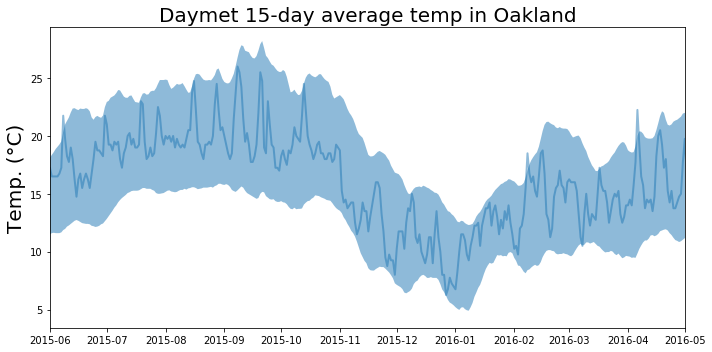

In [12]:
%matplotlib inline
fig, (ax1) = plt.subplots(1, figsize=(10, 5), sharex=True)
rolling3day = df.rolling(15).mean()  ## calculates the rolling mean every 15 days
ax1.fill_between(rolling3day.index, rolling3day.tmin, rolling3day.tmax, alpha=0.5, lw=0) #This creates a polygon between tmin and tmax
ax1.plot(df.index, df[['tmax', 'tmin']].mean(axis=1), lw=2, alpha=0.5)

ax1.set_title('Daymet 15-day average temp in Oakland', fontsize=20)
ax1.set_ylabel(u'Temp. (°C)', fontsize=20)
ax1.set_xlim(['2015-06', '2016-05'])

#monthlysum = df.resample("M", how='sum')
#ax2.bar(monthlysum.index, monthlysum.prcp, width=20,)
#ax2.set_title('Daymet monthly precip in Oakland', fontsize=20)
#ax2.set_ylabel(u'Precip. (mm)', fontsize=20)

fig.tight_layout()

### Reading EDF monitoring data to get location of measurements

In [30]:
df_measured = pd.read_csv('EDF_Data.csv', header = 1)
# Extracting only the latitude and longitude
df_measured = df_measured[['Latitude','Longitude']]

In [31]:
def daymet_avg(lon, lat, year1, year2):
    df1 = daymetpy.daymet_timeseries(lon=lon, lat=lat, start_year=year1, end_year=year2, as_dataframe=True)
    df1.reset_index(inplace=True) #Reset index such that we have a column as YYYY-MM-DD
    df1.rename(columns={'index':'Datestamp'}, inplace=True) #Rename index as Datestamp
    start_date = str(year1) + '-06-01'
    end_date = str(year2) + '-05-31'
    df1 = df1[(df1['Datestamp']>= start_date) & (df1['Datestamp'] <= end_date)] # Filter for days only between June 2015 to May 2016
    df1.drop(columns=['swe'], inplace = True) #Drop snow water equivalent since its always zero in Oakland
    df1_avg = np.mean(df1)
    return (df1_avg['dayl'],df1_avg['prcp'],df1_avg['srad'], df1_avg['tmax'] ,df1_avg['tmin'] ,df1_avg['vp'])

In [32]:
daymet_average = []
for row in df_measured.head(100).iterrows():
    daymet_average.append(daymet_avg(row[1]['Longitude'], row[1]['Latitude'], 2015, 2016)) ## create a list with daymet parameters for each location
    if (row[0]%9 == 0):
        print("Processed {} rows".format(row[0]))

daymet_average = pd.DataFrame(daymet_average) #convert list to a dataframe

Processed 0 rows
Processed 9 rows
Processed 18 rows
Processed 27 rows
Processed 36 rows
Processed 45 rows
Processed 54 rows
Processed 63 rows
Processed 72 rows
Processed 81 rows
Processed 90 rows
Processed 99 rows


In [33]:
daymet_average

,0,1,2,3,4,5
0,43223.606557,1.650273,341.831694,20.744536,11.528689,922.076503
1,43223.606557,1.650273,341.831694,20.744536,11.528689,922.076503
2,43223.606557,1.650273,341.831694,20.744536,11.528689,922.076503
3,43223.606557,1.650273,341.831694,20.744536,11.528689,922.076503
4,43223.606557,1.650273,341.831694,20.744536,11.528689,922.076503
...,...,...,...,...,...,...
95,43223.606557,1.573770,340.869945,20.659836,11.573770,921.639344
96,43223.606557,1.592896,342.644808,20.833333,11.519126,922.185792
97,43223.606557,1.592896,342.644808,20.833333,11.519126,922.185792
98,43223.606557,1.592896,342.644808,20.833333,11.519126,922.185792


## Exploring WorldClim Data

#### An easy way to read WorldClim data is to use the 'latlon_utils' package. Documentation for this package is available <a href = "https://pypi.org/project/latlon-utils/#worldclim2-0"> here. </a> This package contains two libraries: get_country which requires the latitude (N) and longitude (E) degrees as inputs. The 'get_country' package sends a request to the <a href = "https://worldclim.org/data/index.html"> WorldClim2.0 </a> based on the coordiantes provided to the 'get_country' package.

In [89]:
from latlon_utils import get_country
from latlon_utils import get_climate

In [90]:
# Enter coordinates. Here coordinates for a point in Oakland are provided.
get_country(37.806781, -122.322594)

'United States of America'

In [92]:
print(get_climate(37.806781, -122.322594))

tavg  jan      9.952454
      feb     11.765015
      mar     12.758301
      apr     14.218811
      mai     15.860962
      jun     17.787415
      jul     18.616150
      aug     18.756531
      sep     19.056030
      oct     17.182495
      nov     13.254700
      dec     10.120178
      djf     10.612549
      mam     14.279358
      jja     18.386698
      son     16.497742
      ann     14.944087
prec  jan    120.000000
      feb    103.000000
      mar     88.000000
      apr     35.000000
      mai     12.000000
      jun      4.000000
      jul      1.000000
      aug      2.000000
      sep      7.000000
      oct     33.000000
      nov     81.000000
      dec     84.000000
      djf    102.333333
      mam     45.000000
      jja      2.333333
      son     40.333333
      ann     47.500000
Name: (37.806781, -122.322594), dtype: float64


#### You will notice that get_climate only displays the average temperature and precipitation data. Even though the WorldClim website says other parameters such as tmin, tmax etc. are avaialble, there is no easy way to request this data from the website. Besides, its not clear which month of the year the above data represents. Due to lack of clarity on what this data represents, the WorldClim data is not used in this project. 

### **Additional References**
##### 1) Plotting and visualizin netcdf4 files: http://www2.geog.ucl.ac.uk/~plewis/geogg122_local/geogg122.old/Chapter3_Scientific_Numerical_Python/Scientific_Numerical_Python.html
##### 2) Some more plotting and visualizations: https://www.science-emergence.com/Articles/How-to-change-imshow-axis-values-labels-in-matplotlib-/
##### 3) Some more plotting and visualizations: https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html